**TITANIC DATASET AND PREDICTION OF SURVIVAL**

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.svm import SVC
%matplotlib inline 
import plotly.express as px

**MOUNTING THE GOOGLE DRIVE TO READ THE FILES**

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**READING THE CSV FILE FOR TITANIC DATASET**

In [5]:
titanic_train = pd.read_csv('/content/gdrive/MyDrive/MACHINE LEARNING ALGORITHM 1/13-Logistic-Regression/titanic_train.csv')
titanic_test = pd.read_csv('/content/gdrive/MyDrive/MACHINE LEARNING ALGORITHM 1/13-Logistic-Regression/titanic_test.csv')

In [6]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**WE OBSERVE THERE ARE 177 NULL VALUES IN AGE AND 687 NULL VALUES IN CABIN COLUMN**

In [10]:
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

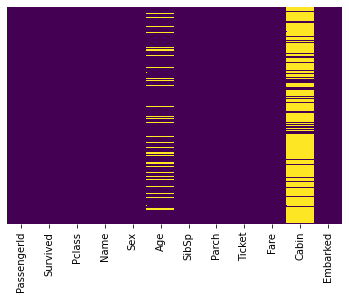

In [11]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**WE DROP THE PASSENGERID, NAME, TICKET, CABIN COLUMNS BECAUSE THEY ARE OF NOT THAT IMPORTANCE IN PREDICTION**

In [13]:
titanic_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SURVIVAL COUNT')

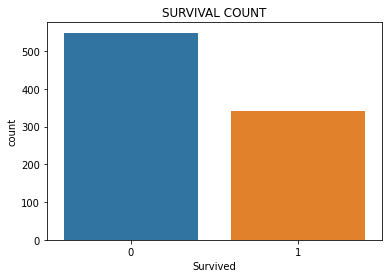

In [27]:
sns.countplot(titanic_train['Survived'])
plt.title('SURVIVAL COUNT')

**VISUALIZING THE SURVIVAL DEPENDENCY ON SEX**

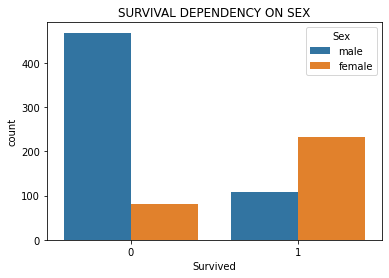

In [32]:
sns.countplot(x='Survived',hue='Sex',data=titanic_train)
plt.title('SURVIVAL DEPENDENCY ON SEX')
plt.show()

WE OBSERVE FROM THE ABOVE GRAPH THAT MOST OF THE MALES LOST THEIR LIVES IN THE TRAGIC TITANIC INCIDENT AND SO THERE IS A DEPENDENCY OF GENDER ON SURVIVAL PREDICTION

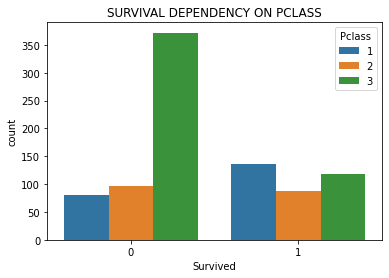

In [33]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_train)
plt.title('SURVIVAL DEPENDENCY ON PCLASS')
plt.show()

TO UNDERSTAND THE DEPENDENCY OF GENDER ON THE SURVIVAL PREDICTION WE PLOTTED THE GRAPH ALONG WITH THE CLASS THEY WERE ACCOMODATED IN AND WE OBSERVE THAT MOST OF THE MALE FROM THE 3RD CLASS LOST THEIR LIVES SO THERE IS A STRONG ROLE OF THE CLASS OF ACCOMODATION ON THE PREDICTION OF SURVIVAL

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


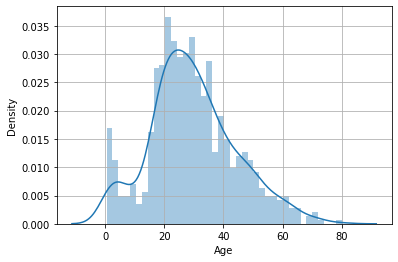

In [39]:
sns.distplot(titanic_train['Age'].dropna(),bins=40)
plt.grid()

THE VARIATION OF AGES OF PEOPLE BOARDED ON THE GIGANTIC TITANIC WERE MOSTLY BETWEEN 20-40

Text(0.5, 1.0, 'COUNT OF SIBLINGS/SPOUSE ON BOARD')

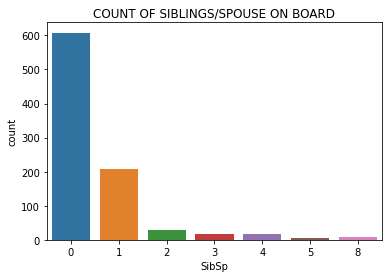

In [66]:
sns.countplot(x='SibSp',data=titanic_train)
plt.title('COUNT OF SIBLINGS/SPOUSE ON BOARD')

THE ABOVE VARIATION STRONGLY SUGGEST THAT MOST PEOPLE WHO BOARDED THE TITANIC WERE EITHER SINGLE OR COUPLE  

In [14]:
def compute_age(data):
  age = data[0]
  pclass = data[1]
  if pd.isnull(age):
    if pclass==1:
      return titanic_train['Age'].loc[titanic_train['Pclass']==pclass].mean()
    elif pclass==2:
      return titanic_train['Age'].loc[titanic_train['Pclass']==pclass].mean()
    else:
      return titanic_train['Age'].loc[titanic_train['Pclass']==pclass].mean()
  else:
    return age 

In [15]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(compute_age,axis=1)

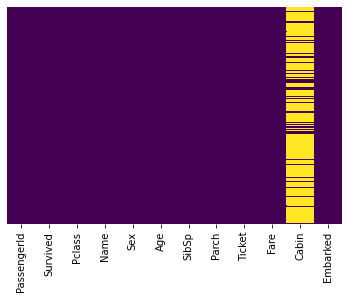

In [16]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


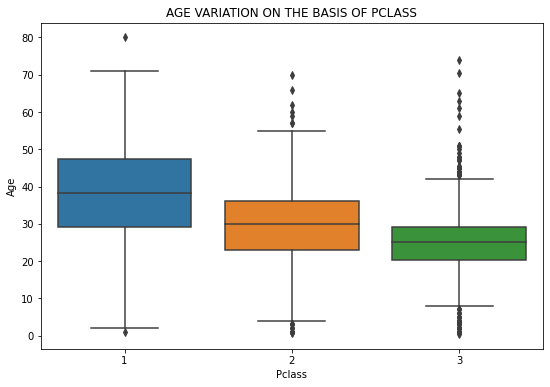

In [17]:
plt.figure(figsize=(9,6))
sns.boxplot(y='Age',x='Pclass',data=titanic_train)
plt.title('AGE VARIATION ON THE BASIS OF PCLASS')
plt.show()

In [18]:
titanic_train.drop(['Cabin'],inplace=True,axis=1)

In [19]:
titanic_train.dropna(inplace=True)

In [20]:
titanic_train.drop(['PassengerId','Name'],inplace=True,axis=1)

In [21]:
sex = pd.get_dummies(titanic_train['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_train['Embarked'],drop_first=True)

THE ABOVE CODE CREATE DUMMIES FOR THE SEX AND EMBARK COLUMN

In [22]:
titanic_train = pd.concat([titanic_train,sex,embark],axis=1)

In [23]:
titanic_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,113803,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,373450,8.0500,S,1,0,1


In [24]:
titanic_train.drop(['Sex','Ticket','Embarked'],inplace=True,axis=1)

THE ABOVE CODE DROPS THE SEX,TICKET AND EMBARKED COLUMN IS OF NO USE SO WE DROP THOSE COLUMNS

In [25]:
titanic_train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
def compute_age_test(data):
  age = data[0]
  pclass = data[1]
  if pd.isnull(age):
    if pclass==1:
      return titanic_test['Age'].loc[titanic_test['Pclass']==pclass].mean()
    elif pclass==2:
      return titanic_test['Age'].loc[titanic_test['Pclass']==pclass].mean()
    else:
      return titanic_test['Age'].loc[titanic_test['Pclass']==pclass].mean()
  else:
    return age 

In [27]:
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(compute_age_test,axis=1)

In [28]:
titanic_test.dropna(inplace=True)

In [29]:
sex = pd.get_dummies(titanic_test['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_test['Embarked'],drop_first=True)
titanic_test = pd.concat([titanic_test,sex,embark],axis=1)

In [30]:
titanic_test.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],inplace=True,axis=1)

In [31]:
titanic_test.head(5)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
12,1,23.0,1,0,82.2667,0,0,1
14,1,47.0,1,0,61.1750,0,0,1
24,1,48.0,1,3,262.3750,0,0,0
26,1,22.0,0,1,61.9792,0,0,0
28,1,41.0,0,0,30.5000,1,0,1


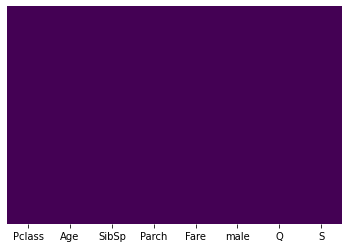

In [32]:
sns.heatmap(titanic_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

CREATING THE TARGET AND THE FEATURE DATAFRAME

In [57]:
y = titanic_train['Survived']
x = titanic_train.drop(['Survived'],axis=1)

SPLITTING THE TARGET AND FEATURE DATAFRAME INTO TEST AND TRAIN SET

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

CALLING THE LOGISTIC REGRESSION MODEL FROM SKLEARN AND FITTING THE DATASET IN THE MODEL  AND PREDICTING ON TEST CASES

In [65]:
lr = LogisticRegression(max_iter=500,n_jobs=-1,random_state=12345)
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)

IMORTING THE CONFUSION MATRIX FROM SKLEARN

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



ABOVE IS THE REPORT 

In [68]:
print('ACCURACY :',accuracy_score(y_test,prediction))

ACCURACY : 0.8352059925093633


THE ACCURACY ACHIEVED WITH THE ABOVE MODEL IS 83.52%

In [64]:
cm = confusion_matrix(y_test,prediction)

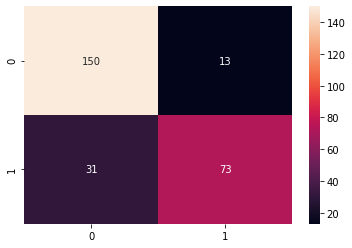

In [69]:
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

HEATMAP TO VISUALIZE THE CONFUSION MATRIX 

In [46]:
print(confusion_matrix(y_test,prediction))

[[150  13]
 [ 33  71]]


PREDICTING THE SURVIVAL ON THE TEST CASE OF THE TITANIC DATASET

In [70]:
prediction2 = lr.predict(titanic_test)

In [75]:
pred = pd.DataFrame(prediction2,index=titanic_test.index,columns=['Survived'])

CONCATINATING THE TEST DATASET WITH THE SURVIVAL PREDICTION

In [76]:
titanic_test = pd.concat([pred,titanic_test],axis=1)

In [77]:
titanic_test

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
12,1,1,23.0,1,0,82.2667,0,0,1,1
14,1,1,47.0,1,0,61.1750,0,0,1,1
24,1,1,48.0,1,3,262.3750,0,0,0,1
26,1,1,22.0,0,1,61.9792,0,0,0,1
28,0,1,41.0,0,0,30.5000,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
404,0,1,43.0,1,0,27.7208,1,0,0,0
405,0,2,20.0,0,0,13.8625,1,0,0,0
407,0,1,50.0,1,1,211.5000,1,0,0,0
411,1,1,37.0,1,0,90.0000,0,1,0,1


**THE TITANIC INCIDENT REMAINS ONE OF THE MOST TRAGIC INCIDENT IN THE HUMAN HISTORY AND A BIG LESSON FOR THE GENERATIONS TO COME WITH THE ABOVE MACHINE LEARNING MODEL WE WANTED TO PREDICT WHEATHER A TRAVELLER WOULD HAVE SURVIVED OR NOT ON THE BASIS OF THE FEATURES WE HAVE CONSIDERED AND WE ACHIEVED AN EFFICIENCY OF 83% WHICH IS QUITE GOOD WE ALSO USE THE NORMALIZATION AND STANDARDIZATION PROPERTIES TO CLEAN THE DATA BUT THAT REDUCED THE ACCURACY OF THE MODEL AND ALSO INCREASED THE TYPE 1 AND TYPE 2 ERROR WHICH IS NOT GOOD FOR THE MODEL AND WE CONSIDER ONLY THE RAW DATA FOR THE PREDICTION AND FOR THE PREDICTION**